In [84]:
import pandas as pd
import numpy as np
import requests
#!conda install -c conda-forge folium=0.5.0 --yes
#import folium

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

# Wrangling Callejero Data Set

### This data set will give us latitude and longitude information for each neighborhood

In [2]:
s = 'https://datos.madrid.es/egob/catalogo/200075-1-callejero.csv'

#s = 'http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv'

In [3]:
df = pd.read_csv(s, encoding='latin-1', error_bad_lines=False, sep=';')

In [4]:
#c=pd.read_csv(s)

In [5]:
#c.head()

In [6]:
df.head()

,Codigo de numero,Codigo de via,Clase de la via,Partícula de la vía,Nombre de la vía,Literal de numeracion,Codigo de distrito,Nombre del distrito,Codigo de barrio,Nombre del barrio,...,Coordenada X (Guia Urbana) cm,Coordenada Y (Guia Urbana) cm,Longitud en S R ETRS89 WGS84,Latitud en S R ETRS89 WGS84,Tipo de la via a la que pertenece el numero,Situacion de la via respecto al terreno,Tipo de denominacion de la via,Parcela catastral del numero,Tipologia del numero,Zona de valor del numero
0,31031089,31001337,AUTOVIA,,A-1,KM.001000EN,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,44305633,448250340,3º40'23.6'' W,40º29'21.82'' N,Topónimo,Nivel,Admon,,Parcela,R21S
1,31031088,31001337,AUTOVIA,,A-1,KM.001000SA,16,HORTALEZA,6,VALDEFUENTES,...,44312246,448249077,3º40'20.75'' W,40º29'21.45'' N,Topónimo,Nivel,Admon,,Parcela,R21N
2,31031091,31001337,AUTOVIA,,A-1,KM.001100EN,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,44367522,448330933,3º39'57.57'' W,40º29'48.11'' N,Topónimo,Nivel,Admon,,Parcela,R21S
3,31031090,31001337,AUTOVIA,,A-1,KM.001100SA,16,HORTALEZA,6,VALDEFUENTES,...,44373755,448325151,3º39'54.87'' W,40º29'46.28'' N,Topónimo,Nivel,Admon,,Parcela,R21R
4,31031093,31001337,AUTOVIA,,A-1,KM.001200EN,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,44425207,448408185,3º39'33.3'' W,40º30'13.32'' N,Topónimo,Nivel,Admon,,Parcela,R21O


In [7]:
callejero = df.filter(['Nombre del distrito','Longitud en S R  ETRS89 WGS84','Latitud en S R  ETRS89 WGS84'], axis=1)

In [8]:
callejero.head()

,Nombre del distrito,Longitud en S R ETRS89 WGS84,Latitud en S R ETRS89 WGS84
0,FUENCARRAL-EL PARDO,3º40'23.6'' W,40º29'21.82'' N
1,HORTALEZA,3º40'20.75'' W,40º29'21.45'' N
2,FUENCARRAL-EL PARDO,3º39'57.57'' W,40º29'48.11'' N
3,HORTALEZA,3º39'54.87'' W,40º29'46.28'' N
4,FUENCARRAL-EL PARDO,3º39'33.3'' W,40º30'13.32'' N


In [9]:
callejero.shape

(207842, 3)

In [10]:
callejero.columns = ['Distrito','Longitud','Latitud']

In [11]:
callejero.head()

,Distrito,Longitud,Latitud
0,FUENCARRAL-EL PARDO,3º40'23.6'' W,40º29'21.82'' N
1,HORTALEZA,3º40'20.75'' W,40º29'21.45'' N
2,FUENCARRAL-EL PARDO,3º39'57.57'' W,40º29'48.11'' N
3,HORTALEZA,3º39'54.87'' W,40º29'46.28'' N
4,FUENCARRAL-EL PARDO,3º39'33.3'' W,40º30'13.32'' N


### Ejemplo para sacar una longitud

In [12]:
print(callejero.iloc[2]['Longitud'])

3º39'57.57'' W  


In [13]:
import re
lat = callejero.iloc[2]['Longitud']
deg, part2 =  re.split('º', lat)
mins,secs,none,di= part2.replace("'", "-").split("-")
di2 = " ".join(re.findall("[a-zA-Z]+", di))
(float(deg) + float(mins)/60 + float(secs)/(60*60)) * (-1 if di2 in ['W', 'S'] else 1)

-3.6659916666666668

In [14]:
#import re
#lat = callejero.iloc[2]['Longitud']
#lat

In [15]:
#deg, part2 =  re.split('º', lat)
#print(part2)

In [16]:
#mins,secs,none,di= part2.replace("'", "-").split("-")

In [17]:
#di2 = " ".join(re.findall("[a-zA-Z]+", di))
#di2

In [18]:
#(float(deg) + float(mins)/60 + float(secs)/(60*60)) * (-1 if di2 in ['W', 'S'] else 1)

In [19]:
#(float(deg) + float(minutes)/60 + float(seconds)/(60*60)) * (-1 if direction in ['W', 'S'] else 1)

In [20]:
##import re
##lat = '''51º36'9.18"N'''
##deg, minutes, seconds, direction =  re.split('[º\'"]', lat)
##(float(deg) + float(minutes)/60 + float(seconds)/(60*60)) * (-1 if direction in ['W', 'S'] else 1)

Create an empty dataframe to start building the dataframe where coordinates are converted to the right format

In [21]:
test = callejero.head()

In [22]:
test.head()

,Distrito,Longitud,Latitud
0,FUENCARRAL-EL PARDO,3º40'23.6'' W,40º29'21.82'' N
1,HORTALEZA,3º40'20.75'' W,40º29'21.45'' N
2,FUENCARRAL-EL PARDO,3º39'57.57'' W,40º29'48.11'' N
3,HORTALEZA,3º39'54.87'' W,40º29'46.28'' N
4,FUENCARRAL-EL PARDO,3º39'33.3'' W,40º30'13.32'' N


In [23]:
distritostest = pd.DataFrame()
i=0
for row in test.iterrows():
    rowIndex = test.index[i]
    distritostest.loc[rowIndex, 'Distritos'] = test['Distrito'].values[i]
    #distritostest['Distritos']=test['Distrito'].values[i]
    
    long = test['Longitud'].values[rowIndex]
    deg, part2 =  re.split('º', long)
    mins,secs,none,di= part2.replace("'", "-").split("-")
    di2 = " ".join(re.findall("[a-zA-Z]+", di))
    lon=(float(deg) + float(mins)/60 + float(secs)/(60*60)) * (-1 if di2 in ['W', 'S'] else 1)
    distritostest.loc[rowIndex,'Longitud']=lon
    
    lat = test['Latitud'].values[rowIndex]
    deg, part2 =  re.split('º', lat)
    mins,secs,none,di= part2.replace("'", "-").split("-")
    di2 = " ".join(re.findall("[a-zA-Z]+", di))
    lati=(float(deg) + float(mins)/60 + float(secs)/(60*60)) * (-1 if di2 in ['W', 'S'] else 1)
    distritostest.loc[rowIndex,'Latitud']=lati
    
    i = i+1

distritostest.head() 

,Distritos,Longitud,Latitud
0,FUENCARRAL-EL PARDO,-3.673222,40.489394
1,HORTALEZA,-3.672431,40.489292
2,FUENCARRAL-EL PARDO,-3.665992,40.496697
3,HORTALEZA,-3.665242,40.496189
4,FUENCARRAL-EL PARDO,-3.659250,40.503700


In [24]:
distritostest.shape 

(5, 3)

Cannot use following code to process and convert format of each of the rows of the entire dataset due to server limitations. Therefore, will be just fetching the first coordinate values of the district as all coordinates should be close within each other inside the district. Consequently, I will only be converting the first value to the desired format.

In [25]:
#distritos = pd.DataFrame()
#i=0
#for row in callejero.iterrows():
#    rowIndex = callejero.index[i]
#    distritos.loc[rowIndex, 'Distritos'] = callejero['Distrito'].values[i]
#    #distritostest['Distritos']=test['Distrito'].values[i]
    
#    long = callejero['Longitud'].values[rowIndex]
#    deg, part2 =  re.split('º', long)
#    mins,secs,none,di= part2.replace("'", "-").split("-")
#    di2 = " ".join(re.findall("[a-zA-Z]+", di))
#    lon=(float(deg) + float(mins)/60 + float(secs)/(60*60)) * (-1 if di2 in ['W', 'S'] else 1)
#    distritos.loc[rowIndex,'Longitud']=lon
    
#    lat = callejero['Latitud'].values[rowIndex]
#    deg, part2 =  re.split('º', lat)
#    mins,secs,none,di= part2.replace("'", "-").split("-")
#    di2 = " ".join(re.findall("[a-zA-Z]+", di))
#    lati=(float(deg) + float(mins)/60 + float(secs)/(60*60)) * (-1 if di2 in ['W', 'S'] else 1)
#    distritos.loc[rowIndex,'Latitud']=lati
    
#    i = i+1

#distritos.head()   

In [26]:
longitudes = pd.DataFrame(callejero.groupby(['Distrito'])['Longitud'].first())

In [27]:
longitudes.head()

,Longitud
Distrito,
ARGANZUELA,3º42'12.73'' W
BARAJAS,3º35'46.54'' W
CARABANCHEL,3º43'10.93'' W
CENTRO,3º42'14.2'' W
CHAMARTIN,3º39'58.93'' W


In [28]:
longitudes.shape

(21, 1)

In [29]:
latitudes = pd.DataFrame(callejero.groupby(['Distrito'])['Latitud'].first())

In [30]:
latitudes.head()

,Latitud
Distrito,
ARGANZUELA,40º24'16.53'' N
BARAJAS,40º27'0.9'' N
CARABANCHEL,40º22'35.7'' N
CENTRO,40º25'8.03'' N
CHAMARTIN,40º27'4.97'' N


In [31]:
latitudes.shape

(21, 1)

In [32]:
coord = pd.merge(longitudes, latitudes, on='Distrito')

In [33]:
coord.head()

,Longitud,Latitud
Distrito,,
ARGANZUELA,3º42'12.73'' W,40º24'16.53'' N
BARAJAS,3º35'46.54'' W,40º27'0.9'' N
CARABANCHEL,3º43'10.93'' W,40º22'35.7'' N
CENTRO,3º42'14.2'' W,40º25'8.03'' N
CHAMARTIN,3º39'58.93'' W,40º27'4.97'' N


In [34]:
coord = coord.reset_index()

In [35]:
coord.head()

,Distrito,Longitud,Latitud
0,ARGANZUELA,3º42'12.73'' W,40º24'16.53'' N
1,BARAJAS,3º35'46.54'' W,40º27'0.9'' N
2,CARABANCHEL,3º43'10.93'' W,40º22'35.7'' N
3,CENTRO,3º42'14.2'' W,40º25'8.03'' N
4,CHAMARTIN,3º39'58.93'' W,40º27'4.97'' N


## CALLEJERO DATA SET (includes coordinates of each district) = DISTRITOS

In [36]:
distritos = pd.DataFrame()
i=0
for row in coord.iterrows():
    rowIndex = coord.index[i]
    distritos.loc[rowIndex, 'Distritos'] = coord['Distrito'].values[i]
    #distritostest['Distritos']=test['Distrito'].values[i]
    
    long = coord['Longitud'].values[rowIndex]
    deg, part2 =  re.split('º', long)
    mins,secs,none,di= part2.replace("'", "-").split("-")
    di2 = " ".join(re.findall("[a-zA-Z]+", di))
    lon=(float(deg) + float(mins)/60 + float(secs)/(60*60)) * (-1 if di2 in ['W', 'S'] else 1)
    distritos.loc[rowIndex,'Longitud']=lon
    
    lat = coord['Latitud'].values[rowIndex]
    deg, part2 =  re.split('º', lat)
    mins,secs,none,di= part2.replace("'", "-").split("-")
    di2 = " ".join(re.findall("[a-zA-Z]+", di))
    lati=(float(deg) + float(mins)/60 + float(secs)/(60*60)) * (-1 if di2 in ['W', 'S'] else 1)
    distritos.loc[rowIndex,'Latitud']=lati
    
    i = i+1

distritos.head()   

,Distritos,Longitud,Latitud
0,ARGANZUELA,-3.703536,40.404592
1,BARAJAS,-3.596261,40.450250
2,CARABANCHEL,-3.719703,40.376583
3,CENTRO,-3.703944,40.418897
4,CHAMARTIN,-3.666369,40.451381


In [37]:
distritos['Distritos'] = distritos['Distritos'].str.strip()

# Wrangling Population Density Data Set = mad Data Set

In [40]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [41]:
m = 'https://datos.comunidad.madrid/catalogo/dataset/23cb5aac-71c8-4f0d-a3ee-eab9aec7252f/resource/90c6eda7-2991-467a-979e-722398178f35/download/distritos_municipio_madrid.csv'

In [42]:
mad = pd.read_csv(m, encoding='latin-1', error_bad_lines=False, sep=';')

In [43]:
mad.head()

,distrito_codigo,distrito_nombre,municipio_codigo,municipio_nombre,superficie_km2,densidad_por_km2
0,79601,Centro,796,Madrid,5.21,25340.69
1,79602,Arganzuela,796,Madrid,6.52,23306.44
2,79603,Retiro,796,Madrid,5.42,21867.53
3,79604,Salamanca,796,Madrid,5.36,26830.78
4,79605,Chamartín,796,Madrid,9.12,15723.25


In [44]:
mad.drop(['distrito_codigo','municipio_codigo','municipio_nombre','superficie_km2'], axis=1, inplace = True)

In [45]:
mad.head()

,distrito_nombre,densidad_por_km2
0,Centro,25340.69
1,Arganzuela,23306.44
2,Retiro,21867.53
3,Salamanca,26830.78
4,Chamartín,15723.25


In [46]:
mad.shape

(21, 2)

In [47]:
mad.columns = ['Distritos','Densidadkm2']

In [48]:
mad.head()

,Distritos,Densidadkm2
0,Centro,25340.69
1,Arganzuela,23306.44
2,Retiro,21867.53
3,Salamanca,26830.78
4,Chamartín,15723.25


In [49]:
mad.replace(to_replace =[mad.iloc[4][0]],  
                            value ="Chamartin", inplace = True)
mad.replace(to_replace =[mad.iloc[6][0]],  
                            value ="Chamberi", inplace = True)
mad.replace(to_replace =[mad.iloc[18][0]],  
                            value ="Vicalvaro", inplace = True)

In [50]:
mad['Distritos'] = mad['Distritos'].str.strip()

In [51]:
mad['Distritos'] = mad['Distritos'].str.upper()

In [52]:
mad.head()

,Distritos,Densidadkm2
0,CENTRO,25340.69
1,ARGANZUELA,23306.44
2,RETIRO,21867.53
3,SALAMANCA,26830.78
4,CHAMARTIN,15723.25


In [ ]:
#t=mad.iloc[0][0]
#t

In [ ]:
#r=distritos.iloc[3][0]
#r

In [ ]:
#t==r

## Merged Data Set: Callejero + Population Density

In [53]:
merged = pd.merge(distritos, mad, on='Distritos')

In [54]:
merged.head()

,Distritos,Longitud,Latitud,Densidadkm2
0,ARGANZUELA,-3.703536,40.404592,23306.44
1,BARAJAS,-3.596261,40.450250,1076.06
2,CARABANCHEL,-3.719703,40.376583,17316.88
3,CENTRO,-3.703944,40.418897,25340.69
4,CHAMARTIN,-3.666369,40.451381,15723.25


In [55]:
merged.shape

(21, 4)

# Analyzing population density

In [140]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [171]:
mad2 = mad.sort_values('Densidadkm2',ascending=True)

In [172]:
mad2.set_index('Distritos', inplace = True)

In [173]:
mad2 = mad2['Densidadkm2'].tail(8)
mad2

Distritos
USERA            17535.32
CIUDAD LINEAL    18455.56
RETIRO           21867.53
ARGANZUELA       23306.44
CENTRO           25340.69
SALAMANCA        26830.78
TETUAN           28664.25
CHAMBERI         29049.26
Name: Densidadkm2, dtype: float64

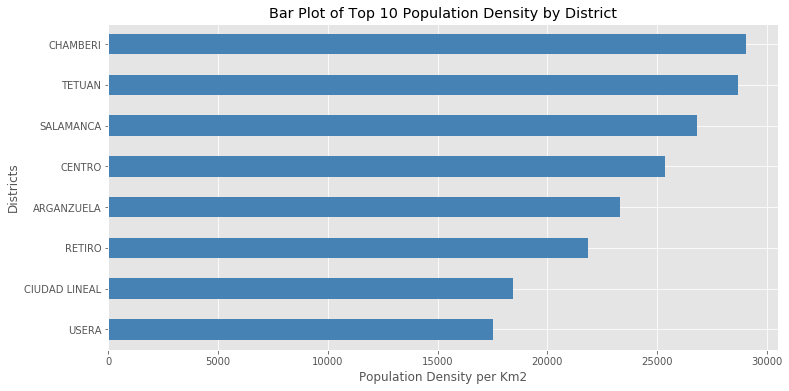

In [178]:
mad2.plot(kind='barh', figsize=(12, 6), color='steelblue')

plt.title('Bar Plot of Top 10 Population Density by District') 
plt.xlabel('Population Density per Km2') # add y-label
plt.ylabel('Districts')

plt.show()

#### We are only interested in places that are very populated. Therefore, we will only keep as candidates the top 5 districts in population density
* Chamberi
* Tetuan
* Salamanca
* Centro
* Arganzuela

In [201]:
top5 = merged[(merged['Distritos'].isin(['CHAMBERI','TETUAN','SALAMANCA','CENTRO','ARGANZUELA']))]
top5

,Distritos,Longitud,Latitud,Densidadkm2
0,ARGANZUELA,-3.703536,40.404592,23306.44
3,CENTRO,-3.703944,40.418897,25340.69
5,CHAMBERI,-3.711703,40.434694,29049.26
14,SALAMANCA,-3.681403,40.421958,26830.78
16,TETUAN,-3.704361,40.464525,28664.25


## Map for reference of districts

In [98]:
!pip install folium
import folium

     |████████████████████████████████| 102kB 10.9MB/s ta 0:00:01


In [212]:
map_madrid = folium.Map(location=[40.4115, -3.7076], zoom_start=12)

for lat, lng, label in zip(top5['Latitud'], top5['Longitud'], top5['Distritos']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_madrid) 


map_madrid

## Foursquare API

#### Connecting to the FourSquare API

In [247]:
# The code was removed by Watson Studio for sharing.

### Get nearby venues for each district and their coordinates along with venue category and top categories

In [119]:
import json
import requests

Function to get nearby venues for all districts

In [215]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Distritos', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [216]:
madrid_venues = getNearbyVenues(names=top5['Distritos'],
                                   latitudes=top5['Latitud'],
                                   longitudes=top5['Longitud']
                                  )

ARGANZUELA
CENTRO
CHAMBERI
SALAMANCA
TETUAN


In [217]:
madrid_venues.head()

,Distritos,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ARGANZUELA,40.404592,-3.703536,Tabacalera Promoción del Arte,40.406386,-3.703242,Art Gallery
1,ARGANZUELA,40.404592,-3.703536,CSA La Tabacalera de Lavapiés,40.406135,-3.702630,Event Space
2,ARGANZUELA,40.404592,-3.703536,Swinton & Grant,40.405953,-3.701871,Art Gallery
3,ARGANZUELA,40.404592,-3.703536,Viva Gym Embajadores,40.405276,-3.702456,Gymnastics Gym
4,ARGANZUELA,40.404592,-3.703536,Ciudadano Grant,40.405851,-3.701793,Bookstore


In [218]:
madrid_venues.shape

(414, 7)

In [219]:
madrid_venues.groupby('Distritos').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Distritos,,,,,,
ARGANZUELA,100,100,100,100,100,100
CENTRO,100,100,100,100,100,100
CHAMBERI,95,95,95,95,95,95
SALAMANCA,100,100,100,100,100,100
TETUAN,19,19,19,19,19,19


In [220]:
print('There are {} unique venue categories.'.format(len(madrid_venues['Venue Category'].unique())))

There are 108 unique venue categories.


## Analyzing each district's most common venue categories

In [221]:
# one hot encoding
madrid_onehot = pd.get_dummies(madrid_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
madrid_onehot['Distritos'] = madrid_venues['Distritos'] 

# move neighborhood column to the first column
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]

madrid_onehot.head()

,Distritos,Accessories Store,American Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,...,Sushi Restaurant,Taco Place,Tapas Restaurant,Theater,Theme Restaurant,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Wine Shop,Winery
0,ARGANZUELA,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ARGANZUELA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ARGANZUELA,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ARGANZUELA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ARGANZUELA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
madrid_onehot.shape

(414, 109)

In [223]:
madrid_grouped = madrid_onehot.groupby('Distritos').mean().reset_index()
madrid_grouped

,Distritos,Accessories Store,American Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,...,Sushi Restaurant,Taco Place,Tapas Restaurant,Theater,Theme Restaurant,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Wine Shop,Winery
0,ARGANZUELA,0.00,0.00,0.04,0.00,0.000000,0.00,0.000000,0.010000,0.100000,...,0.020000,0.00,0.080000,0.020000,0.01,0.00,0.01,0.01,0.010000,0.01
1,CENTRO,0.01,0.00,0.01,0.02,0.000000,0.00,0.010000,0.000000,0.000000,...,0.000000,0.00,0.050000,0.020000,0.00,0.00,0.00,0.01,0.000000,0.00
2,CHAMBERI,0.00,0.00,0.00,0.00,0.000000,0.00,0.021053,0.031579,0.115789,...,0.021053,0.00,0.042105,0.021053,0.00,0.00,0.00,0.00,0.010526,0.00
3,SALAMANCA,0.00,0.01,0.00,0.00,0.000000,0.01,0.010000,0.050000,0.000000,...,0.000000,0.01,0.020000,0.000000,0.00,0.01,0.00,0.00,0.000000,0.00
4,TETUAN,0.00,0.00,0.00,0.00,0.052632,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.052632,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00


In [224]:
num_top_venues = 5

for hood in madrid_grouped['Distritos']:
    print("----"+hood+"----")
    temp = madrid_grouped[madrid_grouped['Distritos'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARGANZUELA----
                venue  freq
0                 Bar  0.10
1    Tapas Restaurant  0.08
2          Restaurant  0.06
3  Spanish Restaurant  0.06
4         Art Gallery  0.04


----CENTRO----
              venue  freq
0             Plaza  0.08
1             Hotel  0.08
2    Clothing Store  0.06
3  Tapas Restaurant  0.05
4            Hostel  0.04


----CHAMBERI----
                venue  freq
0                 Bar  0.12
1  Spanish Restaurant  0.08
2          Restaurant  0.04
3                Café  0.04
4    Tapas Restaurant  0.04


----SALAMANCA----
                venue  freq
0          Restaurant  0.21
1  Spanish Restaurant  0.17
2              Bakery  0.05
3        Burger Joint  0.04
4      Ice Cream Shop  0.04


----TETUAN----
                venue  freq
0  Spanish Restaurant  0.21
1      Ice Cream Shop  0.05
2       Grocery Store  0.05
3          Restaurant  0.05
4                Park  0.05




### Most common venues

In [225]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [226]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Distritos']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Distritos'] = madrid_grouped['Distritos']

for ind in np.arange(madrid_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Distritos,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ARGANZUELA,Bar,Tapas Restaurant,Restaurant,Spanish Restaurant,Café,Art Gallery,Plaza,Indie Theater,Coffee Shop,Bookstore
1,CENTRO,Plaza,Hotel,Clothing Store,Tapas Restaurant,Restaurant,Hostel,Café,Cocktail Bar,Bookstore,Gourmet Shop
2,CHAMBERI,Bar,Spanish Restaurant,Pub,Tapas Restaurant,Café,Restaurant,Sandwich Place,Beer Garden,Italian Restaurant,Coffee Shop
3,SALAMANCA,Restaurant,Spanish Restaurant,Bakery,Ice Cream Shop,Burger Joint,Café,Dessert Shop,Italian Restaurant,Tapas Restaurant,Clothing Store
4,TETUAN,Spanish Restaurant,Hobby Shop,Gym / Fitness Center,Ice Cream Shop,Mediterranean Restaurant,Mexican Restaurant,Park,Pizza Place,Restaurant,Breakfast Spot


In [229]:

from sklearn.cluster import KMeans
# set number of clusters
kclusters = 4

madrid_grouped_clustering = madrid_grouped.drop('Distritos', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:]

array([1, 3, 1, 2, 0], dtype=int32)

In [230]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

madrid_merged = top5

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
madrid_mergedfinal = madrid_merged.join(neighborhoods_venues_sorted.set_index('Distritos'), on='Distritos')

In [231]:
madrid_mergedfinal.head()

,Distritos,Longitud,Latitud,Densidadkm2,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ARGANZUELA,-3.703536,40.404592,23306.44,1,Bar,Tapas Restaurant,Restaurant,Spanish Restaurant,Café,Art Gallery,Plaza,Indie Theater,Coffee Shop,Bookstore
3,CENTRO,-3.703944,40.418897,25340.69,3,Plaza,Hotel,Clothing Store,Tapas Restaurant,Restaurant,Hostel,Café,Cocktail Bar,Bookstore,Gourmet Shop
5,CHAMBERI,-3.711703,40.434694,29049.26,1,Bar,Spanish Restaurant,Pub,Tapas Restaurant,Café,Restaurant,Sandwich Place,Beer Garden,Italian Restaurant,Coffee Shop
14,SALAMANCA,-3.681403,40.421958,26830.78,2,Restaurant,Spanish Restaurant,Bakery,Ice Cream Shop,Burger Joint,Café,Dessert Shop,Italian Restaurant,Tapas Restaurant,Clothing Store
16,TETUAN,-3.704361,40.464525,28664.25,0,Spanish Restaurant,Hobby Shop,Gym / Fitness Center,Ice Cream Shop,Mediterranean Restaurant,Mexican Restaurant,Park,Pizza Place,Restaurant,Breakfast Spot


In [233]:
# create map
map_clusters = folium.Map(location=[40.4115, -3.7076], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(madrid_mergedfinal['Latitud'], madrid_mergedfinal['Longitud'], madrid_mergedfinal['Distritos'], madrid_mergedfinal['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1: Residential

I decided to call this the residential cluster as fitness centers are very common, there are parks and hobby shops are one of the most common categories. These indicate that this district isn't very touristy.

In [239]:
madrid_mergedfinal.loc[madrid_mergedfinal['Cluster Label'] == 0, madrid_mergedfinal.columns[[0] + list(range(5, madrid_mergedfinal.shape[1]))]]

,Distritos,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,TETUAN,Spanish Restaurant,Hobby Shop,Gym / Fitness Center,Ice Cream Shop,Mediterranean Restaurant,Mexican Restaurant,Park,Pizza Place,Restaurant,Breakfast Spot


### Cluster 2: Dining Cluster

This cluster includes a variety of venues but mostly related to bars and restaurants. These districts are probably very busy as there are many dining places.

In [241]:
madrid_mergedfinal.loc[madrid_mergedfinal['Cluster Label'] == 1, madrid_mergedfinal.columns[[0] + list(range(5, madrid_mergedfinal.shape[1]))]]

,Distritos,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ARGANZUELA,Bar,Tapas Restaurant,Restaurant,Spanish Restaurant,Café,Art Gallery,Plaza,Indie Theater,Coffee Shop,Bookstore
5,CHAMBERI,Bar,Spanish Restaurant,Pub,Tapas Restaurant,Café,Restaurant,Sandwich Place,Beer Garden,Italian Restaurant,Coffee Shop


## Cluster 3: Dessert Area

This cluster shows many different dessert/coffee places among their most common venues.

In [242]:
madrid_mergedfinal.loc[madrid_mergedfinal['Cluster Label'] == 2, madrid_mergedfinal.columns[[0] + list(range(5, madrid_mergedfinal.shape[1]))]]

,Distritos,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,SALAMANCA,Restaurant,Spanish Restaurant,Bakery,Ice Cream Shop,Burger Joint,Café,Dessert Shop,Italian Restaurant,Tapas Restaurant,Clothing Store


## Cluster 4: Tourist Area

This cluster has been marked as tourist area as hotels and hostels are very common along with plazas and a good variety of shops and restaurants.

In [243]:
madrid_mergedfinal.loc[madrid_mergedfinal['Cluster Label'] == 3, madrid_mergedfinal.columns[[0] + list(range(5, madrid_mergedfinal.shape[1]))]]

,Distritos,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,CENTRO,Plaza,Hotel,Clothing Store,Tapas Restaurant,Restaurant,Hostel,Café,Cocktail Bar,Bookstore,Gourmet Shop


Since we are looking to open a specialty cookie shop, we are looking for a district that does not have coffee shops or dessert shops as their most common venue (they are very similar in category to our own business idea) so we would not want to overcrowd the area. We are looking for an area with a good variety of venues as that guarantees that it is a busy area.

We are ruling Tetuan in cluster 1 out as two of the most common venues are a hobby shops and fitness centers. They don't seem to be very compatible with our product and target audience and they already have ice cream shops that could satisfy the dessert need in that area.

We are also ruling Salamanca in cluster 3 out as there are many bakeries, dessert shops and coffee shops, which all fall under the same category. There would be too much competition and not too big of a venue category variety.

Out of Arganzuela, Centro and Chamberi, Centro in cluster 4 would be our ideal candidate. Centro has a plaza as a most common venue, which means people might want something to snack on while there, hotels and stores are also present, so their guests and customers might also want something quick to eat and there are restaurants and food places, so our cookies could work for dessert. There are also coffee shops but they are only the 10th most common type of venue, so we will not overcrowd and this shows that this area is also not a no-go for our category. Our cluster 2 with districts Chamberi and Arganzuela, would be our second option as it is the dining cluster and dessert places could be fitting.

# Putting everything together

Based on our clustering and venue analysis, we would choose Centro as our target district. However, based on population, we would choose Chamberi, as the most populated district. Centro is our fourth most populated district.

The second cluster includes Chamberi and Arganzuela. Therefore, considering the results of population analysis and venue analysis, we would end up choosing Chamberi, being the most populated district and still in our second cluster of preference. Choosing Centro would sacrifice choosing the fourth most populated district, whereas Chamberi seems like the best compromise considering both variables.